In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os
from PIL import Image
import random


In [3]:
def resize_image(image):
    IMG_SIZE = 100
    image = tf.cast(image, tf.float32)
    image = (image/255)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image

In [13]:
full_data = []
combined_data = 'datasets/Combined Data'
three_classes = 'datasets/Tube_Effusion_Normal - 11_7_19'

data_path = combined_data
class_names = [x for x in os.listdir(data_path) if os.path.isdir(data_path + '/' + x)]
print(class_names)
class_dict = {}
for i, name in enumerate(class_names):
    class_dict[name] = i
print(class_dict)

def get_data(): 
    path = data_path
    for di in os.listdir(path):
        dirpath = path+"/"+di
        if (os.path.isdir(dirpath)):

            image_files = [x for x in os.listdir(dirpath) if (x[-4:] == "jpeg" or x[-3:] == "png" or x[-3:] == 'jpg')]

            for img in image_files:
                image = Image.open(dirpath+"/"+img)
                data = np.asarray(image)
                data = resize_image(data)
                image_tuple = np.array([data, class_dict[di]])
                full_data.append(image_tuple)


get_data()
full_data = np.array(full_data)

random.shuffle(full_data)

full_data.shape

['tube', 'aom', 'ome', 'tympanosclerosis', 'cerumen', 'otitis externa', 'csom', 'normal']
{'tube': 0, 'aom': 1, 'ome': 2, 'tympanosclerosis': 3, 'cerumen': 4, 'otitis externa': 5, 'csom': 6, 'normal': 7}


/var/folders/84/c6fx1p654h5cgl4xrm3kgys80000gn/T/ipykernel_16151/3713808321.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_tuple = np.array([data, class_dict[di]])


(2544, 2)

In [14]:
X_full = np.array([x[0] for x in full_data])
y_full = np.array([x[1] for x in full_data])

print(X_full[0].shape)

(100, 100, 3)


In [15]:
split = int(0.7*len(X_full))
X_train = X_full[:split]
X_test = X_full[split:]

y_train = y_full[:split]
y_test = y_full[split:]



In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train[0].shape)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()  # let's have a look at our model so far

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names)))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10


2022-06-30 15:26:52.208660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - ETA: 0s - loss: 0.6510 - accuracy: 0.8152

2022-06-30 15:26:56.249186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 5s 85ms/step - loss: 0.6510 - accuracy: 0.8152 - val_loss: 1.8897 - val_accuracy: 0.4921
Epoch 2/10
56/56 [==============================] - 5s 82ms/step - loss: 0.4248 - accuracy: 0.8691 - val_loss: 1.6517 - val_accuracy: 0.5393
Epoch 3/10
56/56 [==============================] - 4s 80ms/step - loss: 0.3292 - accuracy: 0.9067 - val_loss: 1.2886 - val_accuracy: 0.5825
Epoch 4/10
56/56 [==============================] - 5s 81ms/step - loss: 0.2792 - accuracy: 0.9180 - val_loss: 1.7938 - val_accuracy: 0.5314
Epoch 5/10
56/56 [==============================] - 4s 80ms/step - loss: 0.2121 - accuracy: 0.9348 - val_loss: 1.3317 - val_accuracy: 0.6401
Epoch 6/10
56/56 [==============================] - 4s 70ms/step - loss: 0.1631 - accuracy: 0.9483 - val_loss: 1.9703 - val_accuracy: 0.6008
Epoch 7/10
56/56 [==============================] - 4s 72ms/step - loss: 0.1994 - accuracy: 0.9388 - val_loss: 1.4716 - val_accuracy: 0.6191
Epoch 8/10
56/56 [======

2022-06-30 15:27:49.267958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


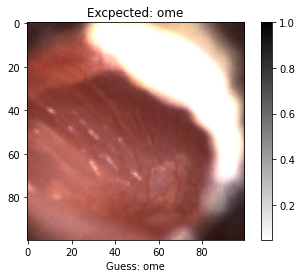

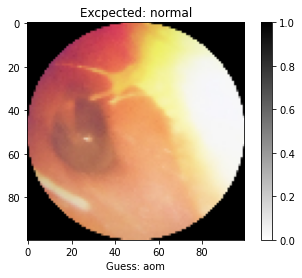

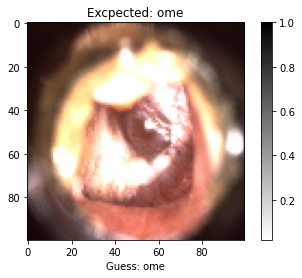

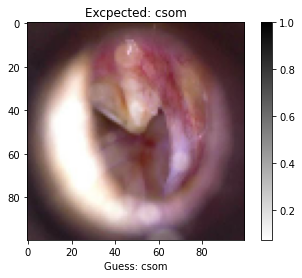

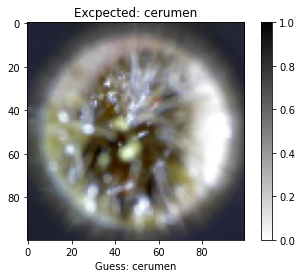

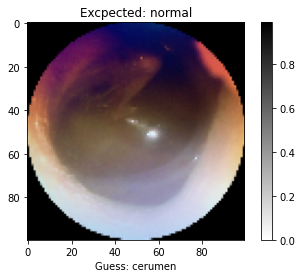

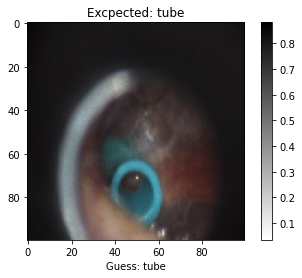

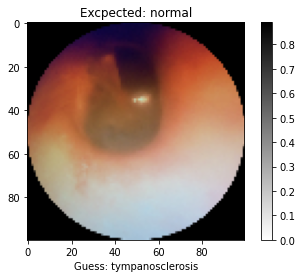

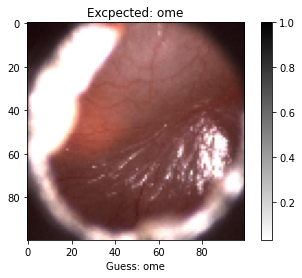

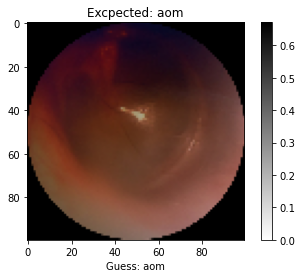

In [22]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
    if num.isdigit():
        num = int(num)
        if 0 <= num <= 1000:
            return int(num)
    else:
        print("Try again...")


for num in range(0, 10):
    image = X_test[num]
    label = y_test[num]
    predict(model, image, label)